In [19]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(1, '../crispr_shrinkage/crispr_shrinkage/framework/')
import CrisprShrinkage as crispr_shrinkage

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
from scipy.stats import binom
from scipy.stats import uniform
from scipy.stats import expon
import numpy as np 

null_proportion = 0.5
positive_proportion = 0.6
target_null_proportion = 0.5
target_positive_population = 0.6

num_ctrl_guides = 50
num_pos_guides = 10

reps = 3
max_dup_factor = 20
max_guide_molecule_factor = 200

pop1_dup_factor_list = np.asarray([np.round(uniform.rvs(1, max_dup_factor)) for _ in range(reps)])
pop2_dup_factor_list = np.asarray([np.round(uniform.rvs(1, max_dup_factor)) for _ in range(reps)])

#expon.rvs(loc=1, scale=1000, size=num_guides)
#uniform.rvs(2, 200, size=num_guides)
def get_counts(num_guides, proportion):
    pop1_list_reps = []
    pop2_list_reps = []

    for rep_i in range(reps):
        n_list = np.round(uniform.rvs(2, max_guide_molecule_factor, size=num_guides)).astype(int)
        pop1_list = binom.rvs(n_list, proportion, size=num_guides) 
        pop2_list = n_list - pop1_list

        pop1_list_reps.append(pop1_list * pop1_dup_factor_list[rep_i])
        pop2_list_reps.append(pop2_list * pop2_dup_factor_list[rep_i])
    
    return np.asarray(pop1_list_reps), np.asarray(pop2_list_reps)


In [21]:
tiling_length = 100

observation_guides = []
for position in range(tiling_length):
    counts = get_counts(1, target_null_proportion)
    pop1_raw_count_reps = counts[0].transpose()[0] + 1
    pop2_raw_count_reps = counts[1].transpose()[0] + 1
    guide = crispr_shrinkage.Guide(identifier="observation_{}".format(position), position=position, pop1_raw_count_reps= pop1_raw_count_reps, pop2_raw_count_reps=pop2_raw_count_reps)

    observation_guides.append(guide)

observation_guides = np.asarray(observation_guides)

In [22]:
negative_guides = []
for i in range(num_ctrl_guides):
    counts = get_counts(1, null_proportion)
    pop1_raw_count_reps = counts[0].transpose()[0] + 1
    pop2_raw_count_reps = counts[1].transpose()[0] + 1
    guide = crispr_shrinkage.Guide(identifier="negative_{}".format(i), position=None, pop1_raw_count_reps= pop1_raw_count_reps, pop2_raw_count_reps=pop2_raw_count_reps)

    negative_guides.append(guide)

negative_guides = np.asarray(negative_guides)

In [23]:
positive_guides = []
for i in range(num_pos_guides):
    counts = get_counts(1, positive_proportion)
    pop1_raw_count_reps = counts[0].transpose()[0] + 1
    pop2_raw_count_reps = counts[1].transpose()[0] + 1
    guide = crispr_shrinkage.Guide(identifier="positive_{}".format(i), position=None, pop1_raw_count_reps= pop1_raw_count_reps, pop2_raw_count_reps=pop2_raw_count_reps)

    positive_guides.append(guide)

positive_guides = np.asarray(positive_guides)

In [24]:
 from decimal import *
 getcontext().prec = 100
 Decimal(100)

Decimal('100')

In [25]:
sc.beta(10,1)

NameError: name 'sc' is not defined

In [ ]:
def precise_gamma(num) -> Decimal:
    return np.exp(Decimal(sc.gammaln(num)))

In [ ]:
def precise_beta(a, b):
    return (precise_gamma(a)*precise_gamma(b))/(precise_gamma(a+b))

In [ ]:
sc.beta(537, 537)/sc.beta(10, 10)

0.0

In [ ]:
float(precise_beta(537, 537)/precise_beta(10, 10))

6.98347e-319

In [ ]:
import scipy
import functools
nc_high = 1200
nc_low = 1300
k_h = 13
k_l = 8

def KL_optim(test, params):
    nc_weight, k_weight = params 
    print(params)
    return crispr_shrinkage.StatisticalHelperMethods.KL_beta(31.0, 26.0, (nc_weight*nc_high) + (k_weight * k_h), (nc_weight*nc_low) + (k_weight * k_l))

res = scipy.optimize.minimize(functools.partial(KL_optim, "1"), [1, 1], method = 'TNC', bounds=((0, np.inf),(0, np.inf)))

[1. 1.]
[1.00000001 1.        ]
[1.         1.00000001]
[0.99999997 1.        ]
[0.99999998 1.        ]
[0.99999997 1.00000001]
[0.98298163 1.0001542 ]
[0.98298164 1.0001542 ]
[0.98298163 1.00015421]
[0.89788978 1.00092519]
[0.89788979 1.00092519]
[0.89788978 1.0009252 ]
[0.         1.00906067]
[1.00000000e-08 1.00906067e+00]
[0.         1.00906068]
[0.44894489 1.00499293]
[0.4489449  1.00499293]
[0.44894489 1.00499294]
[0.22447244 1.0070268 ]
[0.22447245 1.0070268 ]
[0.22447244 1.00702681]
[0.11223622 1.00804373]
[0.11223623 1.00804373]
[0.11223622 1.00804374]
[0.05611811 1.0085522 ]
[0.05611812 1.0085522 ]
[0.05611811 1.00855221]
[0.02805906 1.00880643]
[0.02805907 1.00880643]
[0.02805906 1.00880644]
[0.01402953 1.00893355]
[0.01402954 1.00893355]
[0.01402953 1.00893356]
[0.01402952 1.00893355]
[0.01402953 1.00893355]
[0.01402952 1.00893356]
[0.00942338 1.00897529]
[0.00942339 1.00897529]
[0.00942338 1.0089753 ]
[0.01172646 1.00895442]
[0.01172647 1.00895442]
[0.01172646 1.00895443]


In [ ]:
res

 message: Converged (|f_n-f_(n-1)| ~= 0)
 success: True
  status: 1
     fun: 1.8393772746247428e-10
       x: [ 1.233e-02  1.247e+00]
     nit: 7
     jac: [ 1.155e-05  8.980e-06]
    nfev: 111

In [ ]:
KL_optim("1", res.x)

[0.01232891 1.24661718]


1.8393772746247428e-10

In [ ]:
crispr_shrinkage.StatisticalHelperMethods.KL_beta(31.0, 26.0, 24, 36)

2.53971408061148

In [ ]:
alpha_f, beta_f, alpha_g, beta_g = (31.0, 26.076923076923077, 310, 260)

In [ ]:
Decimal.ln(crispr_shrinkage.StatisticalHelperMethods.precise_beta(alpha_g, beta_g)/(crispr_shrinkage.StatisticalHelperMethods.precise_beta(alpha_f, beta_f)))

Decimal('-354.7024313268700765888752357568591833114624023437500000000000000000000000000000000000000000000000000')

In [26]:
# LEFTOFF - just modifed result to return each guide set separately. So should be able to plot by position and verify that the shrinkage and all works well. Very interested to see if the negatiev controls are over shrunk. and positive controls. since they dont have position.
results = CrisprShrinkage.perform_adjustment(
    negative_control_guides = negative_guides,
    positive_control_guides = positive_guides,
    observation_guides = observation_guides,
    num_replicates = reps,
    include_observational_guides_in_fit = True,
    include_positive_control_guides_in_fit = False,
    pop1_amplification_factors = pop1_dup_factor_list,
    pop2_amplification_factors = pop2_dup_factor_list,
    monte_carlo_trials = 1000,
    enable_spatial_prior =  True,
    spatial_bandwidth = 3,
    spatial_imputation_model_weights = (np.asarray([3.24175049e-03, 3.32948554e-03, 1.00000000e-06]), np.asarray([2.34012001e-01, 1.00000000e-06, 4.83614514e-02])), # This could be optimized by maximizing correlation of guide with neighborhood (perhaps in binomial GLM fashion?),
    baseline_proportion = 0.5, # TODO: Perform validation between (0,1), also accept None value for perfrming no normalization (or have that be another argument)
    shrinkage_prior_strength = None, 
    posterior_estimator = "mean",
    random_seed = 234
    )

Optimizing shrinkage prior weights
[1.e-06]
14.720570491436103
 
[1.01e-06]
14.720531805179121
 
[1.000001]
3.657463522184179
 
[1.00000101]
3.6574634740048353
 
[1.00124794]
3.651458402106278
 
[1.00124795]
3.6514583539679846
 
[1.0062357]
3.62748904752479
 
[1.00623571]
3.627488999550599
 
[1.02618673]
3.532436202031569
 
[1.02618674]
3.5324361547215464
 
[1.10599085]
3.165787153000016
 
[1.10599086]
3.1657871084464384
 
[1.42520736]
1.928533637623031
 
[1.42520737]
1.9285336046811485
 
[2.34446142]
0.1929528134522962
 
[2.34446143]
0.1929528057883434
 
[2.62316777]
0.043675915617358285
 
[2.62316778]
0.04367591235138746
 
[2.83013698]
0.0028943119091573433
 
[2.83013699]
0.0028943111354928774
 
[2.89438458]
6.715568995896426e-05
 
[2.89438459]
6.715557515080128e-05
 
[2.90557997]
1.3569084189590797e-07
 
[2.90557998]
1.356857126655342e-07
 
[2.90610353]
1.0308420783644578e-11
 
[2.90610354]
1.0291767438275201e-11
 
[1.e-06]
20.61283168633754
 
[1.01e-06]
20.612818977881236
 
[1.0000

In [28]:
lfc = [guide.final_LFC_estimate for guide in results]


(array([ 1.,  0.,  1.,  2., 18., 28., 82., 21.,  4.,  3.]),
 array([-0.21449637, -0.1804281 , -0.14635982, -0.11229154, -0.07822326,
        -0.04415498, -0.0100867 ,  0.02398157,  0.05804985,  0.09211813,
         0.12618641]),
 <BarContainer object of 10 artists>)

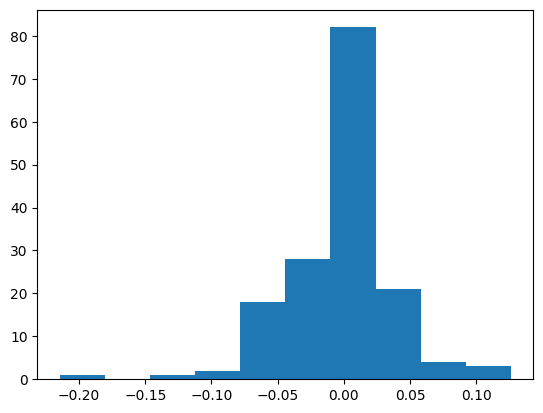

In [30]:
import matplotlib.pyplot as plt
plt.hist(lfc)

In [ ]:
pop1_dup_factor_list is None

In [ ]:
crispr_shrinkage.Guide